In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
import os

In [1]:
import numba as nb

In [2]:
LambdaCDM_settings = {'omega_b':0.0223828,
                     'Omega_m':0.309,
                     'h':0.67810,
                     'A_s':2.100549e-09,
                     'n_s':0.9660499,
                     'tau_reio':0.05430842,
                     'output':'mPk',
                     'P_k_max_1/Mpc':3.0,
                     # The next line should be uncommented for higher precision (but significantly slower running)
                     'ncdm_fluid_approximation':3,
                     # You may uncomment this line to get more info on the ncdm sector from Class:
                     'background_verbose':1
                    }


In [3]:
LambdaCDM = Class()
LambdaCDM.set(LambdaCDMsettings)
LambdaCDM.compute()

In [4]:
def fun3(file3,file4, msmall, normal):
    if normal:
        m1 = msmall
        m2 = (m1**2 + (7.53 * 10**(-5)))**(0.5)
        m3 = (m1**2 + (2.44 * 10**(-3)))**(0.5)
        
    else:
        m3 = msmall
        m1 = (m3**2 + (2.44 * 10**(-3)))**(0.5)
        m2 = (m1**2 + (7.53 * 10**(-5)))**(0.5)
        
    data = np.load(file3)
    e = data['eps']
    f = data['f_nu'] 
    np.savetxt("spectrum",np.column_stack([e,f]))

    neutrino_mass_settings = {'N_ur':0.00441,
                          'N_ncdm':3,
                          'm_ncdm':'{},{},{}'.format(m1,m2,m3)
                         }
    spectrum_settings = {'use_ncdm_psd_files':"1,1,1",
                     'ncdm_psd_filenames':"spectrum,spectrum,spectrum",
                     'T_ncdm':"0.71611,0.71611,0.71611"}
    
    spectrum = Class()
    spectrum.set(LambdaCDMsettings)
    spectrum.set(neutrino_mass_settings)
    spectrum.set(spectrum_settings)
    spectrum.compute()
    Dict_S = {'age': spectrum.age(),
        'Neff': spectrum.Neff(),
        'omega_b': spectrum.omega_b(),
        'Omega0_cdm':spectrum.Omega0_cdm(),
        'h':spectrum.h(),
        'Omega0_k':spectrum.Omega0_k(),
        'Omega0_m': spectrum.Omega0_m(),
        'Omega_b': spectrum.Omega_b(),
        'Omega_g': spectrum.Omega_g(),
        'Omega_lambda': spectrum.Omega_Lambda(),
        'Omega_m': spectrum.Omega_m(),
        'Omega_r': spectrum.Omega_r(),
        'rs_drag': spectrum.rs_drag(),
        'Sigma8': spectrum.sigma8(),
        'Sigma8_cb': spectrum.sigma8_cb(),
        'T_cmb': spectrum.T_cmb(),
        'theta_s_100': spectrum.theta_s_100(),
        'theta_star_100': spectrum.theta_star_100(),  
        'n_s':spectrum.n_s(),
        'tau_reio':spectrum.tau_reio(),
        'output':'mPk',
         }
    kk = np.logspace(-4,np.log10(3),1000) 
    Pk = [] 
    h = spectrum.h()
    for k in kk:
        Pk.append(spectrum.pk(k*h,0.)*h**3) 
    np.savez(file4,k=np.array(kk),p=np.array(Pk),Ds=Dict_S,m1=m1,m2=m2,m3=m3,M=m1+m2+m3)
    os.remove("spectrum")
    

In [5]:
def newthing(spectrumfile, output):
    fun3(spectrumfile,"{}-norm100".format(output),.1,True)
    fun3(spectrumfile,"{}-norm10".format(output),.01,True)
    fun3(spectrumfile,"{}-norm1".format(output),.001,True)
    fun3(spectrumfile,"{}-invert100".format(output),.1,False)
    fun3(spectrumfile,"{}-invert10".format(output),.01,False)
    fun3(spectrumfile,"{}-invert1".format(output),.001,False)

In [6]:
newthing("spectrum.npz","LambdaCDM_mnu")

In [24]:
def delta_plot(output, LCDM):
    models = ["1", "10", "100"]
    k = []
    p = []
    d = []
    
    for i in range(len(models)):
        data = np.load("{}-norm{}.npz".format(output, models[i]), allow_pickle = True)
        k.append(data['k'])
        p.append(data['p'])
        d.append(data['Ds'])
        print(data['Ds'].item()['Neff'])
        
    kk = np.logspace(-4,np.log10(3),1000)

    Pk_LambdaCDM = np.zeros(len(kk)) # P(k) in (Mpc/h)**3

    h = LambdaCDM_settings['h'] # get reduced Hubble for conversions to 1/Mpc

    for i,k in enumerate(kk):
        Pk_LambdaCDM[i] = LCDM.pk(k*h,0.)*h**3 # function .pk(k,z)

    plt.figure()
    plt.semilogx(kk, p[0]/Pk_LambdaCDM - 1, linestyle = '--')
    plt.semilogx(kk, p[1]/Pk_LambdaCDM - 1, linestyle = '-.')
    plt.semilogx(kk, p[2]/Pk_LambdaCDM - 1)
    plt.show()

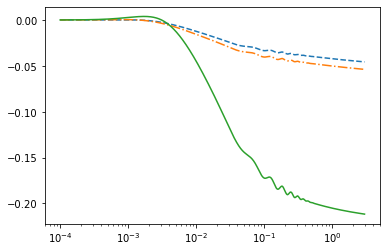

In [8]:
delta_plot("LambdaCDM_mnu", LambdaCDM)

In [6]:
def fun4(file3,file4, msmall, normal):
    if normal:
        m1 = msmall
        m2 = (m1**2 + (7.53 * 10**(-5)))**(0.5)
        m3 = (m1**2 + (2.44 * 10**(-3)))**(0.5)
        
    else:
        m3 = msmall
        m1 = (m3**2 + (2.44 * 10**(-3)))**(0.5)
        m2 = (m1**2 + (7.53 * 10**(-5)))**(0.5)
        
    data = np.load(file3, allow_pickle=True)
    e = data['e'][-1]
    f = data['fe'] [-1]
    np.savetxt("spectrum",np.column_stack([e,f * 2/(2*np.pi)**3]))
    
    Tncdm = 1/ (data['scalefactors'][-1] * data['temp'][-1])

    neutrino_mass_settings = {'N_ur':0.00441,
                          'N_ncdm':3,
                          'm_ncdm':'{},{},{}'.format(m1,m2,m3)
                         }
    spectrum_settings = {'use_ncdm_psd_files':"1,1,1",
                     'ncdm_psd_filenames':"spectrum,spectrum,spectrum",
                     'T_ncdm':"{},{},{}".format(Tncdm,Tncdm,Tncdm),
                        'ncdm_maximum_q':"100,100,100",
                         'ncdm_quadrature_strategy':"3,3,3"
                        
                        }
    
    spectrum = Class()
    spectrum.set(LambdaCDM_settings)
    spectrum.set(neutrino_mass_settings)
    spectrum.set(spectrum_settings)
    spectrum.compute()
    Dict_S = {'age': spectrum.age(),
        'Neff': spectrum.Neff(),
        'omega_b': spectrum.omega_b(),
        'Omega0_cdm':spectrum.Omega0_cdm(),
        'h':spectrum.h(),
        'Omega0_k':spectrum.Omega0_k(),
        'Omega0_m': spectrum.Omega0_m(),
        'Omega_b': spectrum.Omega_b(),
        'Omega_g': spectrum.Omega_g(),
        'Omega_lambda': spectrum.Omega_Lambda(),
        'Omega_m': spectrum.Omega_m(),
        'Omega_r': spectrum.Omega_r(),
        'rs_drag': spectrum.rs_drag(),
        'Sigma8': spectrum.sigma8(),
        'Sigma8_cb': spectrum.sigma8_cb(),
        'T_cmb': spectrum.T_cmb(),
        'theta_s_100': spectrum.theta_s_100(),
        'theta_star_100': spectrum.theta_star_100(),  
        'n_s':spectrum.n_s(),
        'tau_reio':spectrum.tau_reio(),
        'output':'mPk',
         }
    kk = np.logspace(-4,np.log10(3),1000) 
    Pk = [] 
    h = spectrum.h()
    for k in kk:
        Pk.append(spectrum.pk(k*h,0.)*h**3) 
    np.savez(file4,k=np.array(kk),p=np.array(Pk),Ds=Dict_S,m1=m1,m2=m2,m3=m3,M=m1+m2+m3)
    os.remove("spectrum")
    

In [8]:
def newthing4(spectrumfile, output):
    fun4(spectrumfile,"{}-norm100".format(output),.1,True)
    #fun4(spectrumfile,"{}-norm10".format(output),.01,True)
    #fun4(spectrumfile,"{}-norm1".format(output),.001,True)
    #fun4(spectrumfile,"{}-invert100".format(output),.1,False)
    #fun4(spectrumfile,"{}-invert10".format(output),.01,False)
    #fun4(spectrumfile,"{}-invert1".format(output),.001,False)

In [20]:
%%time
newthing4("mass-300-life-0.030.npz", "short_lived")

In [9]:
short_lived = np.load("mass-300-life-0.030.npz",allow_pickle=True)

In [10]:
short_lived.files

['mass',
 'mixing',
 'lifetime',
 'neff',
 'scalefactors',
 'time',
 'temp',
 'Tcm',
 'e',
 'fe',
 'NumbDensityDist',
 'decayrate',
 'collisionrate',
 'n_p_rate',
 'n_p_rate_SM',
 'p_n_rate',
 'p_n_rate_SM',
 'Hubble']

In [11]:
1/(short_lived['scalefactors'][-1] * short_lived['temp'][-1])

0.606538950727753

3.0017865725933635
3.0017865725933635
3.0017865725933635


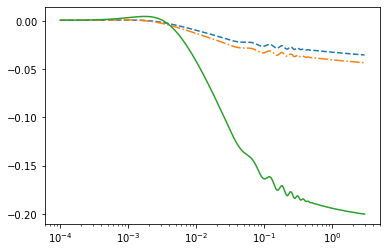

In [25]:
delta_plot("short_lived",LambdaCDM)

In [10]:
%%time
newthing4("mass-300-life-0.912.npz", "long_lived")

CPU times: user 4h 49min 47s, sys: 2min 39s, total: 4h 52min 27s
Wall time: 4h 52min 11s


In [11]:
long_lived = np.load("mass-300-life-0.912.npz",allow_pickle=True)
long_lived.files

['mass',
 'mixing',
 'lifetime',
 'neff',
 'scalefactors',
 'time',
 'temp',
 'Tcm',
 'e',
 'fe',
 'NumbDensityDist',
 'decayrate',
 'collisionrate',
 'n_p_rate',
 'n_p_rate_SM',
 'p_n_rate',
 'p_n_rate_SM',
 'Hubble']

In [15]:
eps=long_lived['e'][-1]
feps = long_lived['fe'][-1]

(0.0, 200.0)

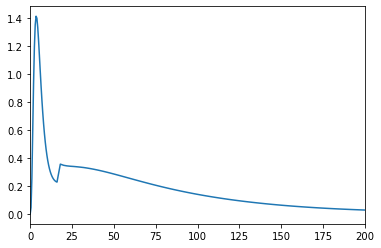

In [25]:
plt.figure()
plt.plot(eps, (eps**3*feps))
plt.xlim(0,200)

In [20]:
eps

array([0.000e+00, 5.000e-01, 1.000e+00, ..., 2.692e+03, 2.694e+03,
       2.696e+03])

In [23]:
eps[:34]

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       18. ])

In [27]:
npz = np.load("long_lived-norm100.npz",allow_pickle=True)
npz.files

['k', 'p', 'Ds', 'm1', 'm2', 'm3', 'M']

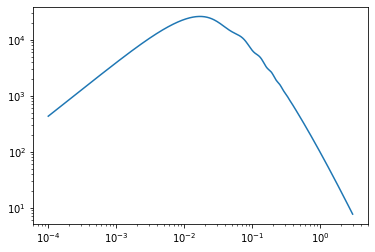

In [28]:
plt.figure()
plt.loglog(npz['k'],npz['p'])

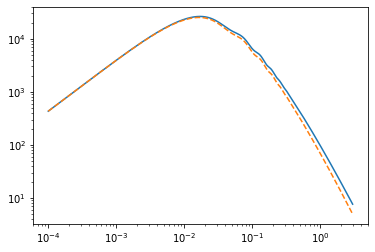

In [33]:
kk = np.logspace(-4,np.log10(3),1000)

Pk_LambdaCDM = np.zeros(len(kk)) # P(k) in (Mpc/h)**3

h = LambdaCDM_settings['h'] # get reduced Hubble for conversions to 1/Mpc

for i,k in enumerate(kk):
    Pk_LambdaCDM[i] = LambdaCDM.pk(k*h,0.)*h**3 # function .pk(k,z)

plt.figure()
plt.loglog(npz['k'],npz['p'])
plt.loglog(kk,Pk_LambdaCDM,linestyle='--')

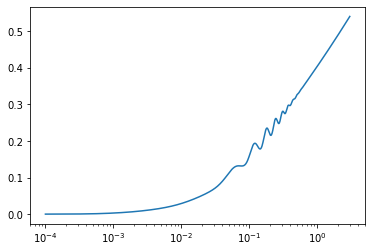

In [31]:
plt.figure()
plt.semilogx(kk,npz['p']/Pk_LambdaCDM-1)

In [34]:
npz['Ds']

array({'age': 13.783487660715632, 'Neff': 2.398873050648049, 'omega_b': 0.022382800000000005, 'Omega0_cdm': 0.2576305882865917, 'h': 0.6781, 'Omega0_k': 0.0, 'Omega0_m': 0.3089989189186588, 'Omega_b': 0.04867734979810887, 'Omega_g': 5.378150968509927e-05, 'Omega_lambda': 0.6909461646258057, 'Omega_m': 0.3089989189186588, 'Omega_r': 5.491645553539315e-05, 'rs_drag': 150.87964814925684, 'Sigma8': 0.904688258457329, 'Sigma8_cb': 0.9115412075247337, 'T_cmb': 2.7255, 'theta_s_100': 1.066847182346521, 'theta_star_100': 1.0692835589773273, 'n_s': 0.9660499, 'tau_reio': 0.05430842, 'output': 'mPk'},
      dtype=object)

In [35]:
long = np.load("mass-300-life-0.912.npz",allow_pickle=True)
long.files

['mass',
 'mixing',
 'lifetime',
 'neff',
 'scalefactors',
 'time',
 'temp',
 'Tcm',
 'e',
 'fe',
 'NumbDensityDist',
 'decayrate',
 'collisionrate',
 'n_p_rate',
 'n_p_rate_SM',
 'p_n_rate',
 'p_n_rate_SM',
 'Hubble']

In [36]:
eps = long['e'][-1]
fe = long['fe'][-1]

In [53]:
earr = np.zeros(50)
farr = np.zeros(50)

earr[:31] = eps[1:32]
farr[:31] = fe[1:32]

earr[31:] = eps[32:180:8]
farr[31:] = fe[32:180:8]

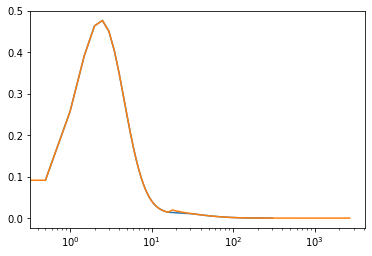

In [55]:
plt.figure()
plt.semilogx(earr,earr**2*farr)
plt.semilogx(eps, eps**2*fe)

In [42]:
np.where(eps<300)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173]),)